In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns

## **Data Visualisation**

In [74]:
series = pd.read_csv("daily-minimum-temperatures.csv",header=0,index_col=0, parse_dates=True,
                                                    squeeze=True) 
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [75]:
# To remove the multi-index characteristics
# series = pd.read_csv("daily-minimum-temperatures.csv",header=0,index_col=0, parse_dates=True,
#                                                     squeeze=True).reset_index()
# series.head()

<AxesSubplot:xlabel='Date'>

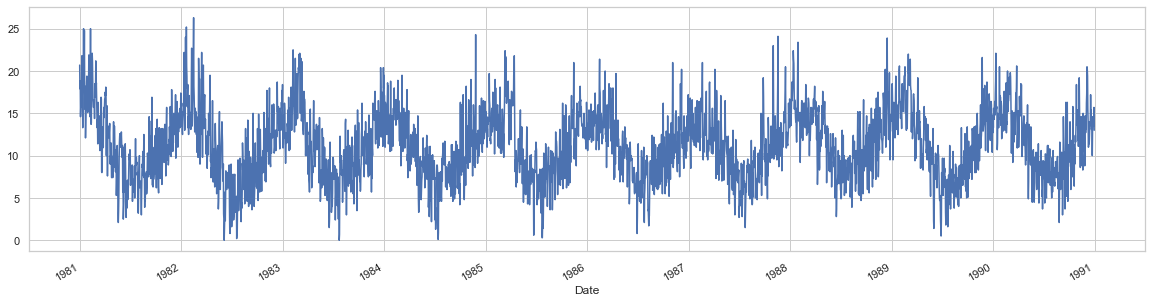

In [76]:
fig,ax = plt.subplots(figsize=(20,5))
series.plot()

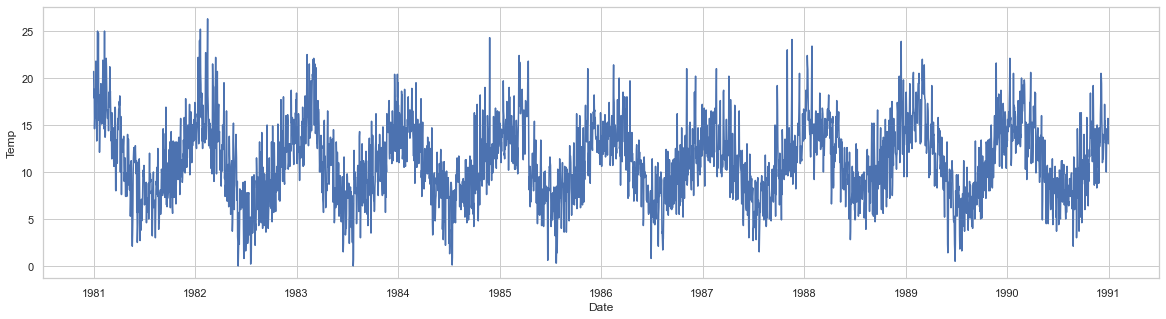

In [77]:
# Using seaborn
fig,ax = plt.subplots(figsize=(20,5)) # L,W
ax = sns.lineplot(data=series)

In [78]:
fig = px.line(series,x=series.index,
y='Temp',title="Date vs Temp") #,markers=True
fig.show()

<AxesSubplot:xlabel='Date'>

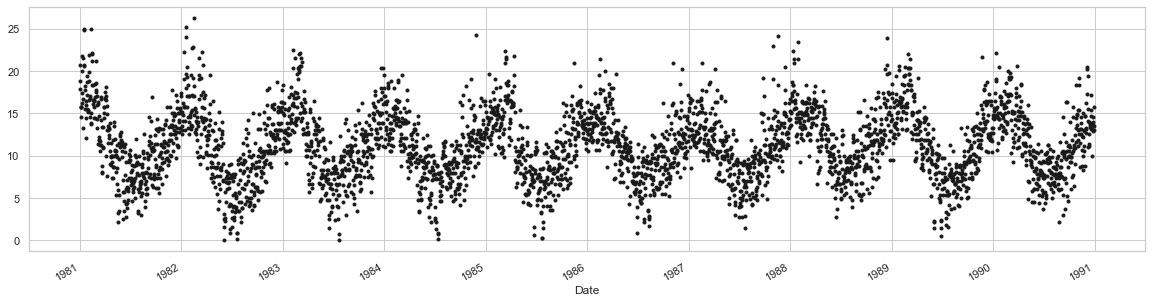

In [79]:
fig,ax = plt.subplots(figsize=(20,5))
series.plot(style='k.') # k., c., g. --> Dotted graph

In [80]:
series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [81]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html highlight=grouper#pandas.Grouper
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

# It can be helpful to compare line plots for the same interval, 
# such as from day-to-day, month-to-month, and year-to-year.

groups = series.groupby(pd.Grouper(freq='A')) # grouping by years
years = pd.DataFrame()

# name is the key and the group is the value of the groupby
for name,group in groups:
    years[name.year] = group.values

years.columns.value_counts().sum() # 10 columns
years


,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


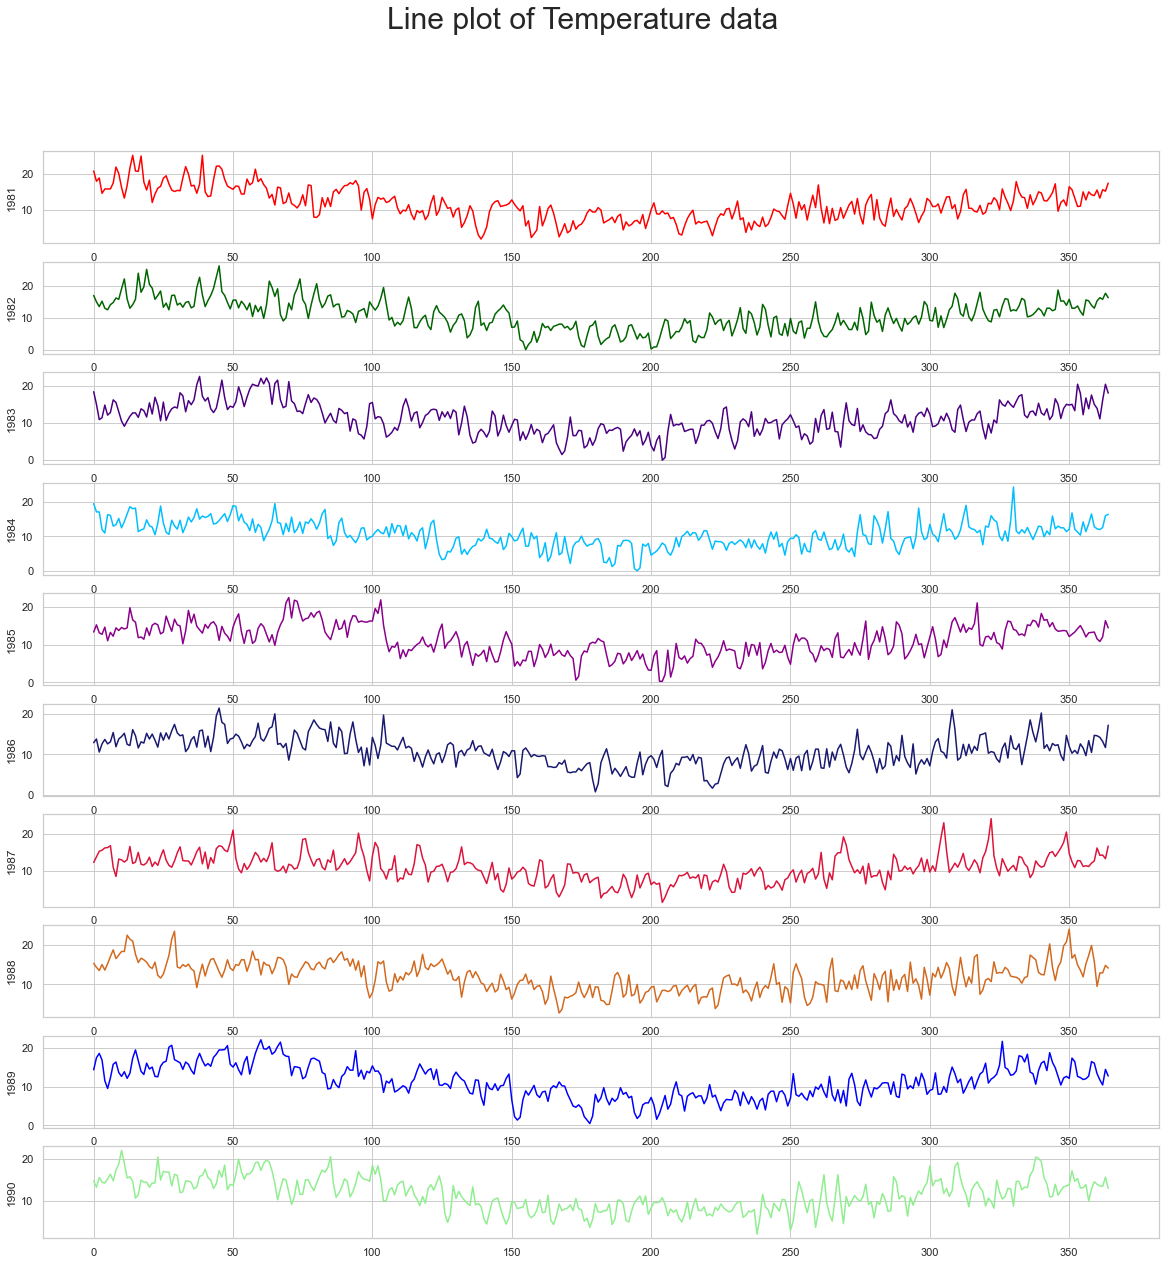

In [82]:
fig, ax = plt.subplots(10,1, figsize=(20,20))
ax = ax.ravel()
sns.set_theme(style="whitegrid")
colors_list = ['red',
                'darkgreen',
                'indigo','deepskyblue','darkmagenta',
                'midnightblue','crimson','chocolate','blue','lightgreen']

for index, value in enumerate(years.iloc[:,:]):
    sns.lineplot(data=years,x=years.index, y=value, color=colors_list[index], ax=ax[index])
    fig.suptitle("Line plot of Temperature data",fontsize=30)


**Histogram and Density Plots**

In [83]:
series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

Text(0.5, 0.98, 'Histogram of the Minimum Daily Temperatures dataset.')

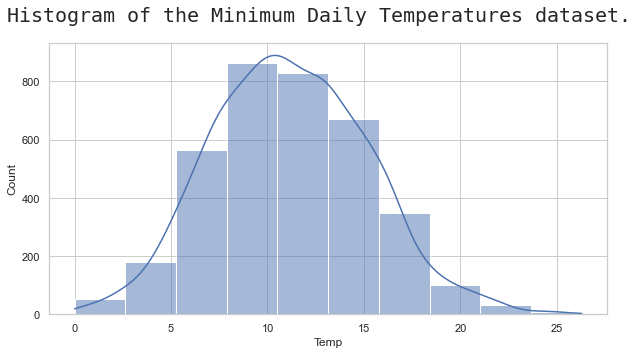

In [84]:
# Using seaborn
fig,ax = plt.subplots(figsize=(10,5)) # L,W
ax = sns.histplot(data=series,kde=True,bins=10)
fig.suptitle("Histogram of the Minimum Daily Temperatures dataset.",fontsize=20,
 fontfamily='monospace')

<AxesSubplot:>

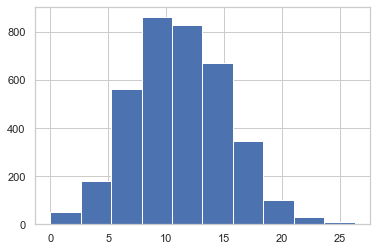

In [85]:
series.hist()

<AxesSubplot:ylabel='Density'>

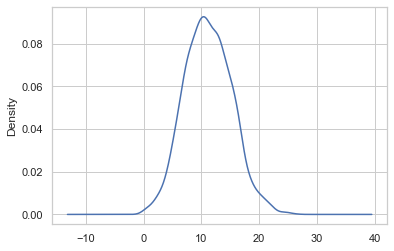

In [86]:
series.plot(kind='kde')

**Box & Whisker Plots by Interval**

Text(0.5, 0.98, 'Boxplot of the Minimum Daily Temperatures dataset.')

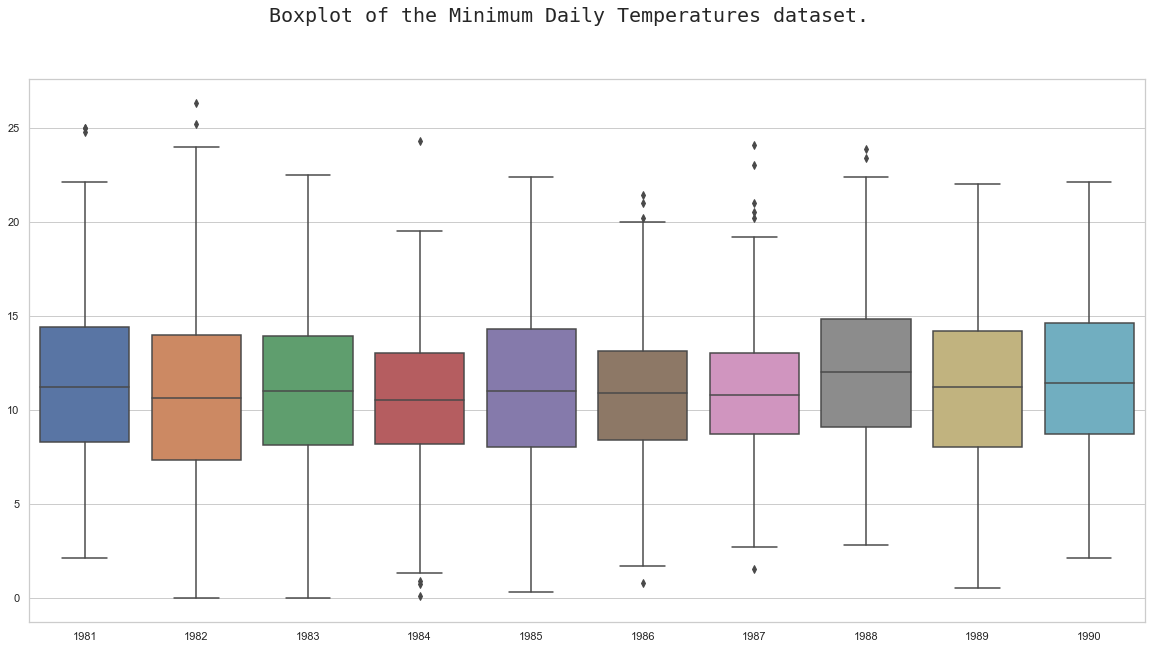

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(data=years)
fig.suptitle("Boxplot of the Minimum Daily Temperatures dataset.",fontsize=20,
                     fontfamily='monospace')

In [88]:
pd.DataFrame(series)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [110]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html highlight=grouper#pandas.Grouper
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

# It can be helpful to compare line plots for the same interval, 
# such as from day-to-day, month-to-month, and year-to-year.

one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M')) # grouping by months for a year

months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1) 
# x[1] is referring to the months; years-months-day --> 0,1,2

months = pd.DataFrame(months)

# Renaming the columns of months
months.columns = range(1,13)
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5
5,15.3,12.9,17.2,17.0,13.3,6.8,4.4,7.8,10.3,9.2,18.3,20.2
6,16.4,13.4,14.2,15.8,7.0,6.0,5.7,7.7,7.5,9.8,19.2,19.4
7,14.8,15.9,10.3,15.2,4.9,6.6,10.2,8.6,3.0,6.0,15.4,15.5
8,17.4,16.1,13.0,15.1,6.9,7.8,10.2,6.5,5.3,9.8,13.1,14.1
9,18.8,17.6,15.3,14.7,13.7,10.3,9.3,6.9,10.5,9.2,11.5,11.0


Text(0.5, 0.98, 'Boxplot of the Minimum Monthly Temperatures of 1990.')

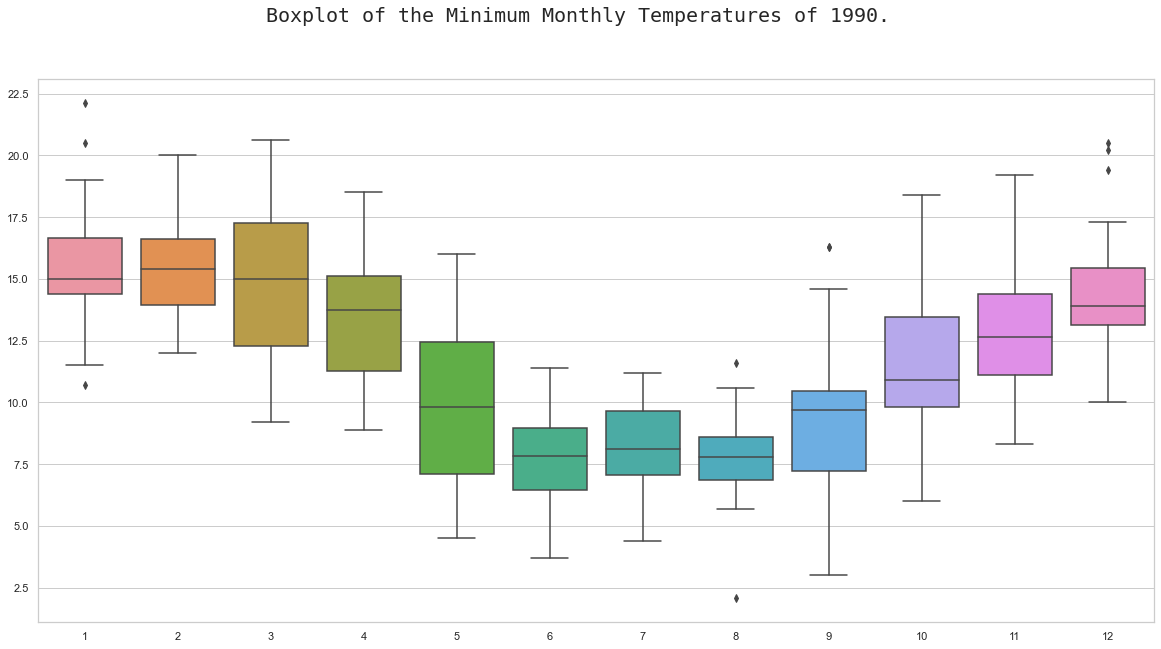

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(data=months)
fig.suptitle("Boxplot of the Minimum Monthly Temperatures of 1990.",fontsize=20,
                     fontfamily='monospace')

**Heat Maps**

In [113]:
# # Transposing the years 
# years = years.T
# plt.matshow(years, aspect='auto')
# plt.grid(False)
# fig.suptitle("Boxplot of the Minimum Daily Temperatures dataset.",fontsize=20,
#                      fontfamily='monospace')

In [114]:
# # Transposing the years 
# years = years.T
# plt.matshow(years,interpolation=None, aspect='auto')
# plt.grid(False)
# fig.suptitle("Boxplot of the Minimum Daily Temperatures dataset.",fontsize=20,
#                      fontfamily='monospace')

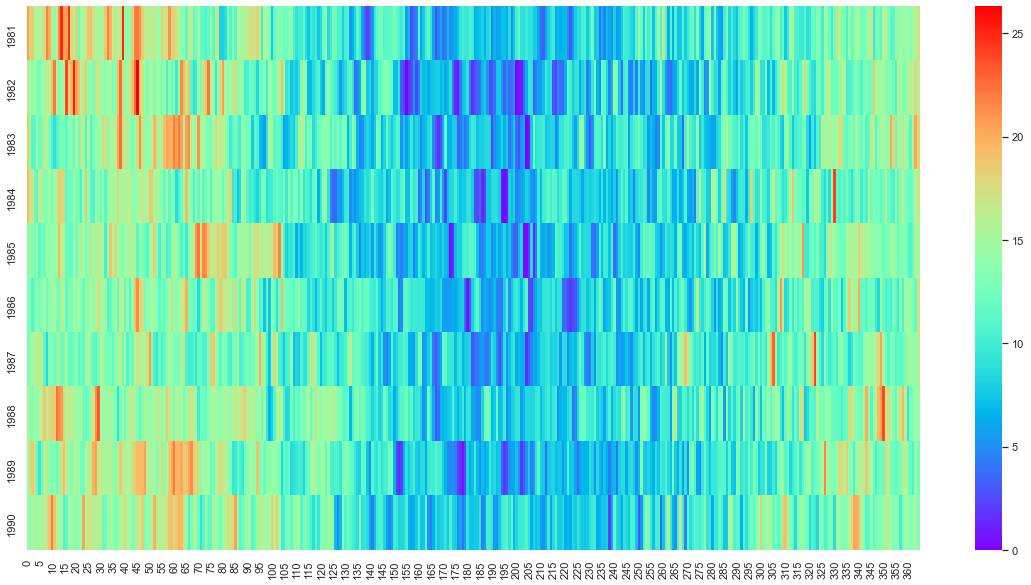

In [121]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax = sns.heatmap(years,cmap="rainbow") 
# plt.xticks(rotation=45)

In [94]:
# Looking into the heart map of a year; 1990 in terms of months
one_year

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 365, dtype: float64

In [95]:
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5
5,15.3,12.9,17.2,17.0,13.3,6.8,4.4,7.8,10.3,9.2,18.3,20.2
6,16.4,13.4,14.2,15.8,7.0,6.0,5.7,7.7,7.5,9.8,19.2,19.4
7,14.8,15.9,10.3,15.2,4.9,6.6,10.2,8.6,3.0,6.0,15.4,15.5
8,17.4,16.1,13.0,15.1,6.9,7.8,10.2,6.5,5.3,9.8,13.1,14.1
9,18.8,17.6,15.3,14.7,13.7,10.3,9.3,6.9,10.5,9.2,11.5,11.0


Text(0.5, 0.98, 'Boxplot of the Minimum Monthly Temperatures of 1990.')

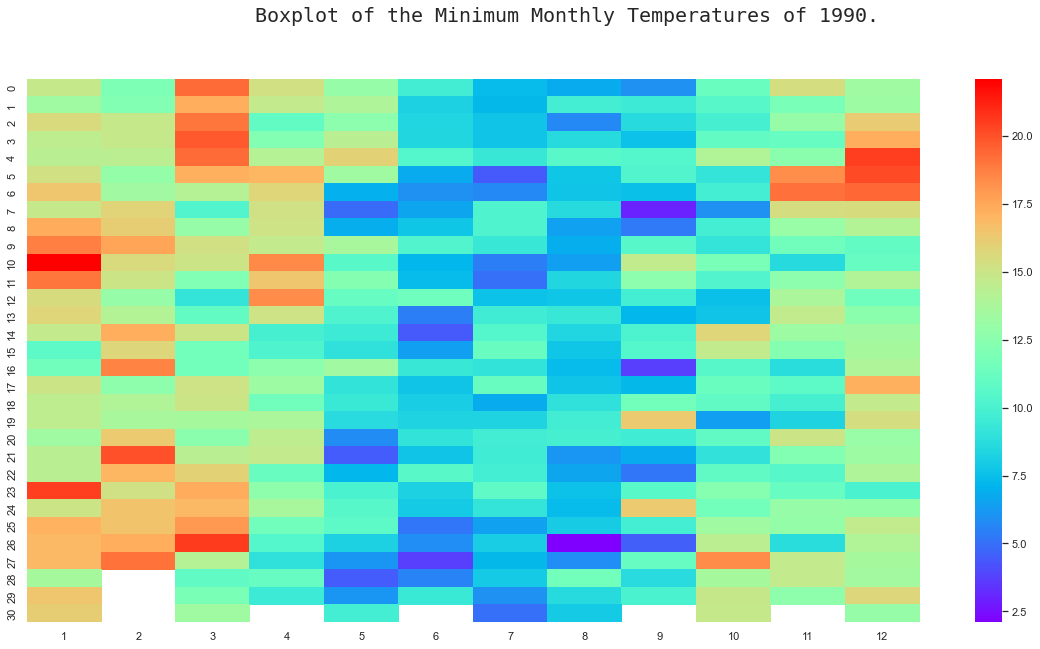

In [120]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax = sns.heatmap(months,cmap="rainbow") # cmap="YlGnBu"
fig.suptitle("Boxplot of the Minimum Monthly Temperatures of 1990.",fontsize=20,
                     fontfamily='monospace')
# plt.xticks(rotation=45)

Text(0.5, 0.98, 'Boxplot of the Minimum Monthly Temperatures of 1990.')

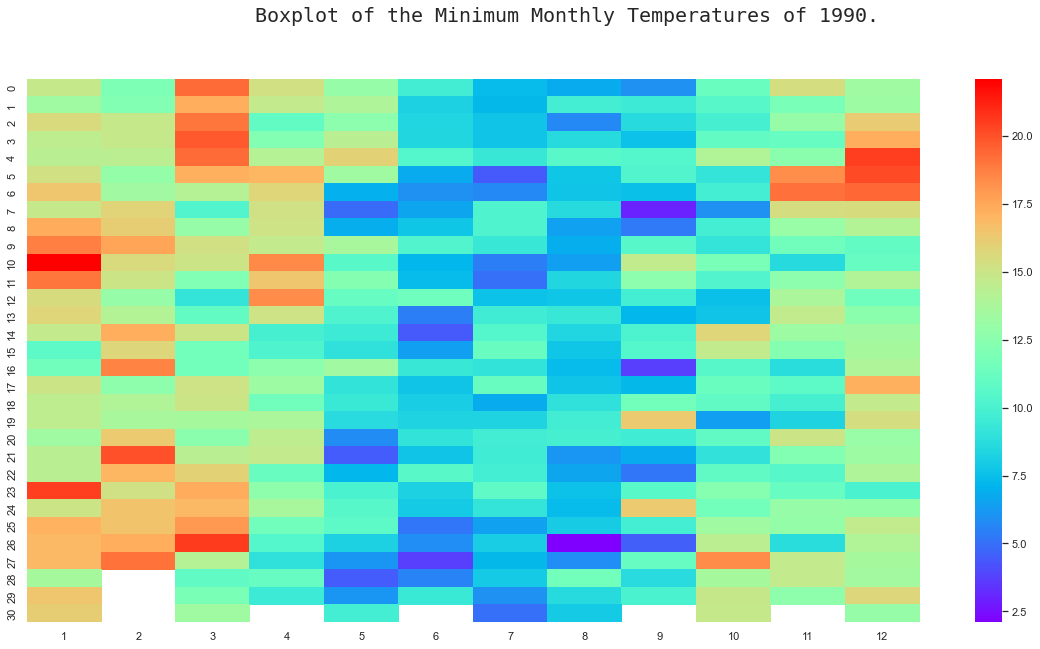

In [119]:
fig,ax = plt.subplots(1,figsize=(20,10))
ax = sns.heatmap(months,cmap="rainbow") 
fig.suptitle("Boxplot of the Minimum Monthly Temperatures of 1990.",fontsize=20,
                     fontfamily='monospace')

**Lag Scatter Plots**

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.
- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
- Either relationship is good as they can be modeled. 

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Lag scatter plot of the Minimum Daily Temperatures dataset.')

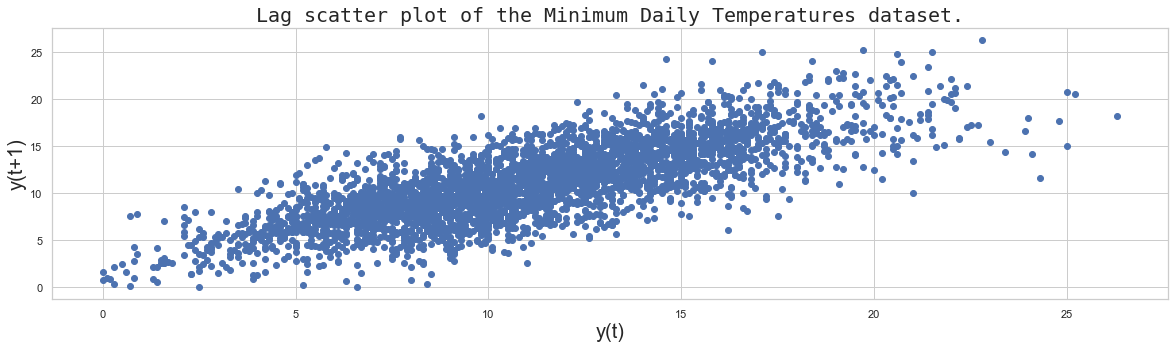

In [122]:
fig,ax = plt.subplots(figsize=(20,5))
lag =1
pd.plotting.lag_plot(series, lag=lag)
plt.xlabel(f"y(t)",size = 20)
plt.ylabel(f"y(t+{lag})",size = 20)
plt.title("Lag scatter plot of the Minimum Daily Temperatures dataset.",fontsize=20,
                     fontfamily='monospace')

In [123]:
values = pd.DataFrame(series.values)
values

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8
...,...
3645,14.0
3646,13.6
3647,13.5
3648,15.7


In [125]:
lags = 7
columns =[values]

columns


[         0
 0     20.7
 1     17.9
 2     18.8
 3     14.6
 4     15.8
 ...    ...
 3645  14.0
 3646  13.6
 3647  13.5
 3648  15.7
 3649  13.0
 
 [3650 rows x 1 columns]]

In [126]:
# Giving the range
for i in range(1,(lags+1)):
    columns.append(values.shift(i)) # Simply appends the shifts into the columns
    
columns

[         0
 0     20.7
 1     17.9
 2     18.8
 3     14.6
 4     15.8
 ...    ...
 3645  14.0
 3646  13.6
 3647  13.5
 3648  15.7
 3649  13.0
 
 [3650 rows x 1 columns],
          0
 0      NaN
 1     20.7
 2     17.9
 3     18.8
 4     14.6
 ...    ...
 3645  14.6
 3646  14.0
 3647  13.6
 3648  13.5
 3649  15.7
 
 [3650 rows x 1 columns],
          0
 0      NaN
 1      NaN
 2     20.7
 3     17.9
 4     18.8
 ...    ...
 3645  12.9
 3646  14.6
 3647  14.0
 3648  13.6
 3649  13.5
 
 [3650 rows x 1 columns],
          0
 0      NaN
 1      NaN
 2      NaN
 3     20.7
 4     17.9
 ...    ...
 3645  10.0
 3646  12.9
 3647  14.6
 3648  14.0
 3649  13.6
 
 [3650 rows x 1 columns],
          0
 0      NaN
 1      NaN
 2      NaN
 3      NaN
 4     20.7
 ...    ...
 3645  13.9
 3646  10.0
 3647  12.9
 3648  14.6
 3649  14.0
 
 [3650 rows x 1 columns],
          0
 0      NaN
 1      NaN
 2      NaN
 3      NaN
 4      NaN
 ...    ...
 3645  13.2
 3646  13.9
 3647  10.0
 3648  12.9
 3649  1

In [127]:
dataframe = pd.concat(columns, axis=1)
dataframe

,0,0,0,0,0,0,0,0
0,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN
2,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN
3,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN
4,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3645,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4
3646,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1
3647,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2
3648,15.7,13.5,13.6,14.0,14.6,12.9,10.0,13.9


In [128]:
# A new variable --> a new column variable that is different from the previous ones !!!
columns = ['t']
columns

['t']

In [129]:
for i in range(1, (lags +1)):
    columns.append('t-' +str(i))

# Renaming the columns
dataframe.columns = columns

In [130]:
dataframe

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7
0,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN
2,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN
3,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN
4,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3645,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4
3646,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1
3647,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2
3648,15.7,13.5,13.6,14.0,14.6,12.9,10.0,13.9


Text(0.5, 0.98, 't vs lags')

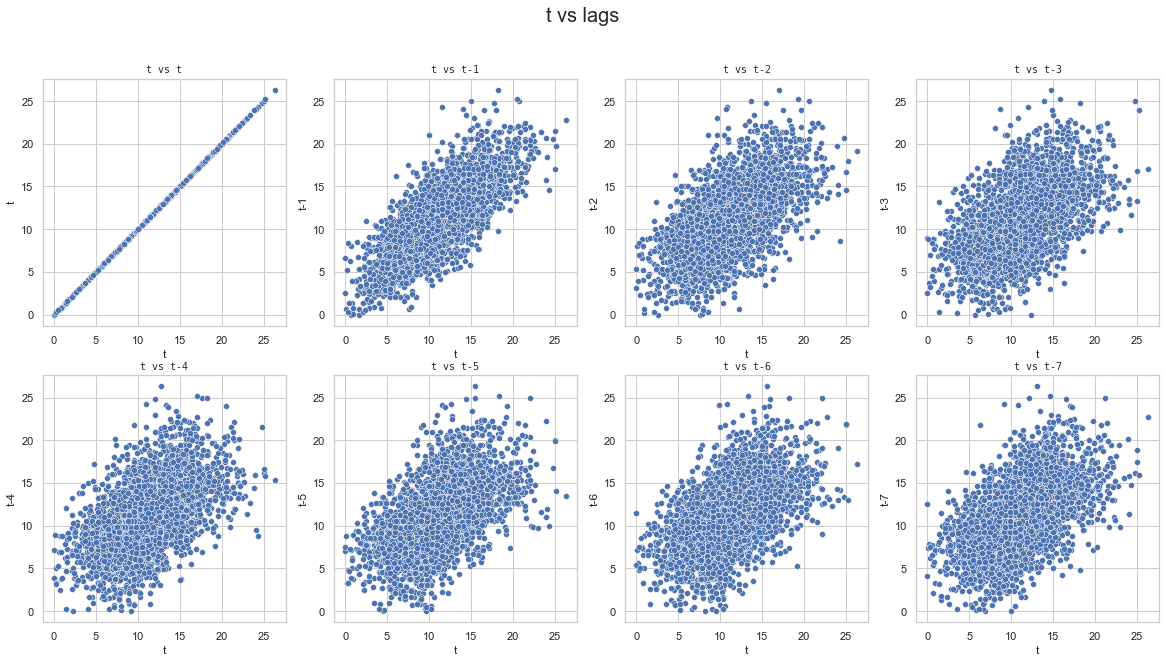

In [105]:
fig,ax = plt.subplots(2,4, figsize=(20,10))
ax = ax.ravel()
for index, values in enumerate(dataframe.iloc[:,:8]):
    sns.scatterplot(data=dataframe,x='t',y=values,ax=ax[index])
    ax[index].set_title(f"t vs {values}", fontsize=10,fontfamily='monospace')

fig.suptitle(f"t vs lags", fontsize=20)

In [106]:
# NOT REALLY USEFUL
# plt.figure(1)

# for i in range(1,(lags +1)):
#     ax = plt.subplot(240 + i )

#     sns.scatterplot(data=dataframe, x=dataframe.t.values, y=dataframe["t-"+ str(i)].values)

**Autocorrelation**

In [131]:
series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

C:\Users\DANNY\Desktop\machine\envs\lib\site-packages\pandas\plotting\_matplotlib\misc.py:443: UserWarning:

Requested projection is different from current axis projection, creating new axis with requested projection.



Text(0.5, 1.0, 'Autocorrelation Plot of the Minimum Daily Temperatures dataset.')

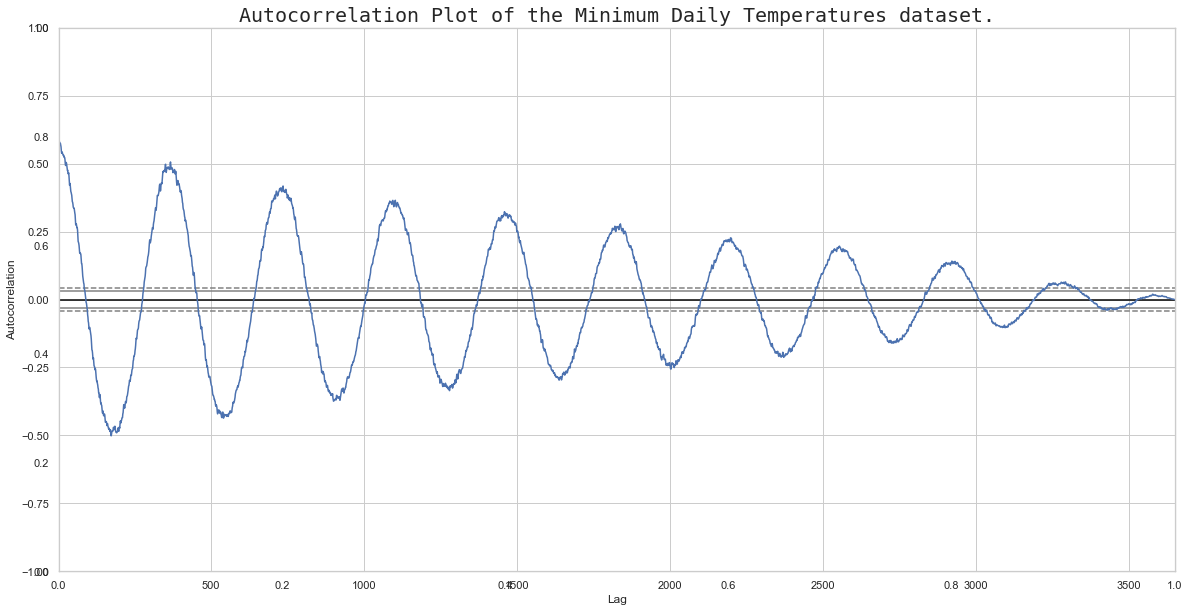

In [107]:
fig,ax = plt.subplots(figsize=(20,10))
pd.plotting.autocorrelation_plot(series)
plt.grid(True)
# fig.suptitle(f"Autocorrelation")
# This is actually a partial autocorrelation plot
ax.set_title("Autocorrelation Plot of the Minimum Daily Temperatures dataset.",fontsize=20,fontfamily="monospace")